In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
# ZMIENNE

today = datetime.now().strftime("%Y-%m-%d")

In [3]:
# Symbol indeksu DAX na Yahoo Finance
symbol = "^GDAXI"

# Określ zakres dat
start_date = "2020-01-01"
end_date = today

# Pobierz dane z Yahoo Finance
dax_dataset = yf.download(symbol, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [5]:
dax_dataset['5_day_avg'] = dax_dataset['Close'].rolling(window=5).mean().shift(1)
dax_dataset['30_day_avg']= dax_dataset['Close'].rolling(window=5).mean().shift(1)
dax_dataset['year_avg'] = dax_dataset['Close'].rolling(window=365).mean().shift(1)
dax_dataset['avg_ratio'] = dax_dataset['5_day_avg']/dax_dataset['year_avg']

dax_dataset['5_day_std'] = dax_dataset['Close'].rolling(window=5).std().shift(1)
dax_dataset['year_std'] = dax_dataset['Close'].rolling(window=365).mean().shift(1)
dax_dataset['std_ratio'] = dax_dataset['5_day_std']/dax_dataset['year_std']

In [6]:
dax_dataset.sort_values(by='Date', inplace=True)

In [7]:
# Przesunięcie kolumny "High" o jeden dzień wstecz
dax_dataset['High_target'] = dax_dataset['High'].shift(-1)

In [8]:
dax_dataset

,Open,High,Low,Close,Adj Close,Volume,5_day_avg,30_day_avg,year_avg,avg_ratio,5_day_std,year_std,std_ratio,High_target
Date,,,,,,,,,,,,,,
2020-01-02,13233.709961,13425.030273,13225.160156,13385.929688,13385.929688,75341400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13282.740234
2020-01-03,13266.389648,13282.740234,13120.719727,13219.139648,13219.139648,80793400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13143.110352
2020-01-06,13085.490234,13143.110352,12948.169922,13126.990234,13126.990234,71778600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13283.879883
2020-01-07,13199.589844,13283.879883,13166.400391,13226.830078,13226.830078,78282300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13334.040039
2020-01-08,13140.490234,13334.040039,13106.269531,13320.179688,13320.179688,88178800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13523.339844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,14870.629883,14933.690430,14789.629883,14892.179688,14892.179688,88086100,14923.854102,14923.854102,14664.774775,1.017667,138.567784,14664.774775,0.009449,14795.410156
2023-10-26,14696.219727,14795.410156,14655.080078,14731.049805,14731.049805,121803600,14883.308008,14883.308008,14666.585432,1.014777,100.408278,14666.585432,0.006846,14824.290039
2023-10-27,14757.110352,14824.290039,14667.370117,14687.410156,14687.410156,86539200,14820.471875,14820.471875,14667.322033,1.010442,66.236448,14667.322033,0.004516,14798.000000


In [9]:
dax_dataset.dropna(axis=0, how='any', inplace=True)

In [10]:
dax_dataset

,Open,High,Low,Close,Adj Close,Volume,5_day_avg,30_day_avg,year_avg,avg_ratio,5_day_std,year_std,std_ratio,High_target
Date,,,,,,,,,,,,,,
2021-06-11,15583.290039,15703.839844,15548.349609,15693.269531,15693.269531,57088600,15632.601953,15632.601953,13038.703550,1.198938,55.001304,13038.703550,0.004218,15802.669922
2021-06-14,15739.889648,15802.669922,15673.639648,15673.639648,15673.639648,46556300,15632.675781,15632.675781,13045.025029,1.198363,55.102632,13045.025029,0.004224,15792.349609
2021-06-15,15744.769531,15792.349609,15714.940430,15729.519531,15729.519531,45999200,15631.973633,15631.973633,13051.749687,1.197692,54.412275,13051.749687,0.004169,15759.660156
2021-06-16,15756.830078,15759.660156,15674.610352,15710.570312,15710.570312,58585900,15649.757617,15649.757617,13058.879904,1.198400,70.182311,13058.879904,0.005374,15752.339844
2021-06-17,15655.320312,15752.339844,15649.219727,15727.669922,15727.669922,62355100,15675.643750,15675.643750,13065.684672,1.199757,61.930457,13065.684672,0.004740,15736.929688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-24,14802.519531,14916.599609,14750.320312,14879.940430,14879.940430,62022100,14998.204102,14998.204102,14662.385705,1.022903,196.667713,14662.385705,0.013413,14933.690430
2023-10-25,14870.629883,14933.690430,14789.629883,14892.179688,14892.179688,88086100,14923.854102,14923.854102,14664.774775,1.017667,138.567784,14664.774775,0.009449,14795.410156
2023-10-26,14696.219727,14795.410156,14655.080078,14731.049805,14731.049805,121803600,14883.308008,14883.308008,14666.585432,1.014777,100.408278,14666.585432,0.006846,14824.290039


In [11]:
dax_dataset = dax_dataset[['Open', 'Low', 'Close', 'Adj Close', 'Volume', 'High_target']]
dax_dataset

,Open,Low,Close,Adj Close,Volume,High_target
Date,,,,,,
2021-06-11,15583.290039,15548.349609,15693.269531,15693.269531,57088600,15802.669922
2021-06-14,15739.889648,15673.639648,15673.639648,15673.639648,46556300,15792.349609
2021-06-15,15744.769531,15714.940430,15729.519531,15729.519531,45999200,15759.660156
2021-06-16,15756.830078,15674.610352,15710.570312,15710.570312,58585900,15752.339844
2021-06-17,15655.320312,15649.219727,15727.669922,15727.669922,62355100,15736.929688
...,...,...,...,...,...,...
2023-10-24,14802.519531,14750.320312,14879.940430,14879.940430,62022100,14933.690430
2023-10-25,14870.629883,14789.629883,14892.179688,14892.179688,88086100,14795.410156
2023-10-26,14696.219727,14655.080078,14731.049805,14731.049805,121803600,14824.290039


In [12]:
dax_dataset.describe()

,Open,Low,Close,Adj Close,Volume,High_target
count,614.000000,614.000000,614.000000,614.000000,6.140000e+02,614.000000
mean,14885.565213,14788.742405,14885.588877,14885.588877,7.115834e+07,14974.699122
std,1099.310863,1114.989731,1096.181329,1096.181329,2.823918e+07,1075.051299
min,11951.839844,11862.839844,11975.549805,11975.549805,2.297500e+07,12137.769531
25%,14096.567383,13977.977783,14083.067871,14083.067871,5.458852e+07,14200.089844
50%,15336.754883,15194.609863,15306.500000,15306.500000,6.481455e+07,15422.825195
75%,15753.544678,15677.207764,15766.912598,15766.912598,7.886165e+07,15813.665039
max,16434.660156,16427.470703,16469.750000,16469.750000,2.198601e+08,16528.970703


In [13]:
dax_dataset.isnull().sum()

Open           0
Low            0
Close          0
Adj Close      0
Volume         0
High_target    0
dtype: int64

In [14]:
dax_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 614 entries, 2021-06-11 to 2023-10-30
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         614 non-null    float64
 1   Low          614 non-null    float64
 2   Close        614 non-null    float64
 3   Adj Close    614 non-null    float64
 4   Volume       614 non-null    int64  
 5   High_target  614 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 33.6 KB


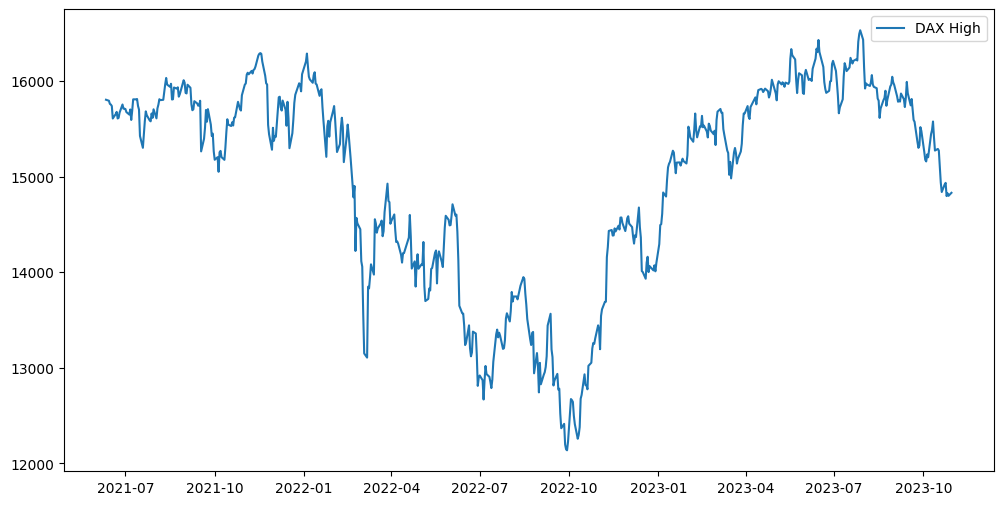

In [15]:
plt.figure(figsize=(12, 6))
plt.plot( dax_dataset["High_target"], label="DAX High")
plt.legend()
plt.show()

In [16]:
dax_dataset

,Open,Low,Close,Adj Close,Volume,High_target
Date,,,,,,
2021-06-11,15583.290039,15548.349609,15693.269531,15693.269531,57088600,15802.669922
2021-06-14,15739.889648,15673.639648,15673.639648,15673.639648,46556300,15792.349609
2021-06-15,15744.769531,15714.940430,15729.519531,15729.519531,45999200,15759.660156
2021-06-16,15756.830078,15674.610352,15710.570312,15710.570312,58585900,15752.339844
2021-06-17,15655.320312,15649.219727,15727.669922,15727.669922,62355100,15736.929688
...,...,...,...,...,...,...
2023-10-24,14802.519531,14750.320312,14879.940430,14879.940430,62022100,14933.690430
2023-10-25,14870.629883,14789.629883,14892.179688,14892.179688,88086100,14795.410156
2023-10-26,14696.219727,14655.080078,14731.049805,14731.049805,121803600,14824.290039


In [17]:
from sklearn.model_selection import train_test_split

# definiuje cechy (features) i cel (target).
features = dax_dataset[['Open', 'Low', 'Close', 'Adj Close', 'Volume']]
target_high = dax_dataset['High_target']  

# Podział danych na zbiór treningowy i zbiór testowy (np. 80% treningowy, 20% testowy).
training_features, test_features, training_target, test_target = train_test_split(features, target_high, test_size=0.2, random_state=42)

# podzial danych do treningu i testowania.
print("training_features:", len(training_features))
print("test_features:", len(test_features))

training_features: 491
test_features: 123


In [18]:
def przygotuj_dane_sekwencyjne(cechy, cel, okno_czasowe):
    dane_sekwencyjne = []
    cele = []

    for i in range(len(cechy) - okno_czasowe):
        dane_sekwencyjne.append(cechy[i:i+okno_czasowe].values)
        cele.append(cel[i+okno_czasowe])

    return np.array(dane_sekwencyjne), np.array(cele)

okno_czasowe = 1  # Przykładowa długość sekwencji
cechy_treningowe_sekw, cel_treningowy_sekw = przygotuj_dane_sekwencyjne(training_features, training_target, okno_czasowe)
cechy_testowe_sekw, cel_testowy_sekw = przygotuj_dane_sekwencyjne(test_features, test_target, okno_czasowe)


C:\Users\MS\AppData\Local\Temp\ipykernel_5100\1843885301.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cele.append(cel[i+okno_czasowe])


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(okno_czasowe, cechy_treningowe_sekw.shape[2])))
model.add(Dense(1))  # 1 wyjście - przewidywana cena zamknięcia

model.compile(optimizer='adam', loss='mean_squared_error')


In [20]:
model.fit(cechy_treningowe_sekw, cel_treningowy_sekw, epochs=50, batch_size=32, validation_data=(cechy_testowe_sekw, cel_testowy_sekw))

Epoch 1/50
16/16 [==============================] - 2s 22ms/step - loss: 600315985920.0000 - val_loss: 48134561792.0000
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 78651555840.0000 - val_loss: 7100272640.0000
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 8585816064.0000 - val_loss: 7910896640.0000
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 2062776320.0000 - val_loss: 2206716928.0000
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 638020608.0000 - val_loss: 464063360.0000
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 168506912.0000 - val_loss: 127426032.0000
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 52619168.0000 - val_loss: 53657560.0000
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 43023736.0000 - val_loss: 46097344.0000
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 3598827

In [21]:
from sklearn.metrics import mean_squared_error

cel_predykcji = model.predict(cechy_testowe_sekw)
mse = mean_squared_error(cel_testowy_sekw, cel_predykcji)
mse

4/4 [==============================] - 0s 1ms/step


37916082.119449675

In [22]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_value = mape(cel_testowy_sekw, cel_predykcji)
mape_value

35.96224923958369

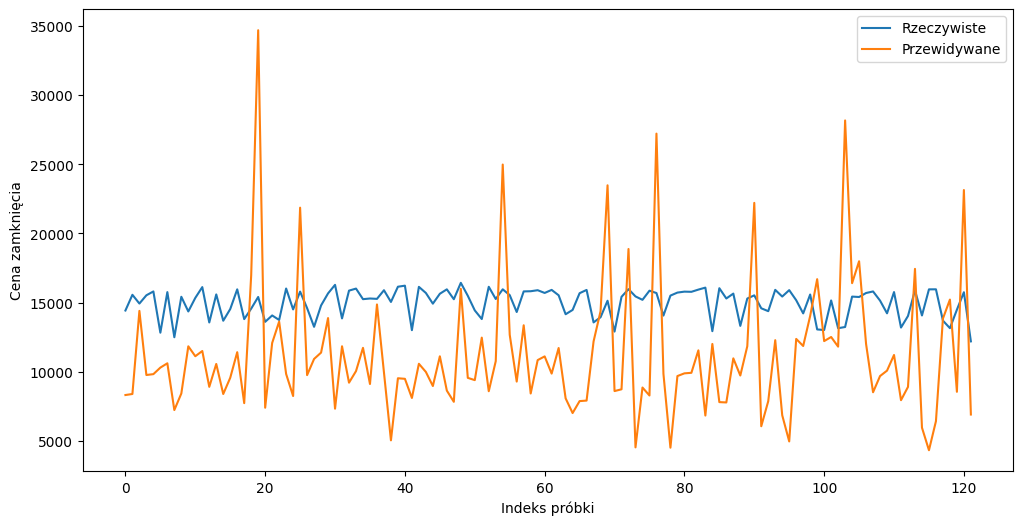

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(cel_testowy_sekw, label='Rzeczywiste')
plt.plot(cel_predykcji, label='Przewidywane')
plt.legend()
plt.xlabel('Indeks próbki')
plt.ylabel('Cena zamknięcia')
plt.show()

In [24]:
df1 = pd.DataFrame(cel_testowy_sekw) 
df2 = pd.DataFrame(cel_predykcji)

podsumowanie = pd.merge(df1, df2,left_index=True, right_index=True)

new_column_names = ['cel_testowy_sekw', 'cel_predykcji']
podsumowanie.columns = new_column_names

podsumowanie

,cel_testowy_sekw,cel_predykcji
0,14429.870117,8318.522461
1,15566.379883,8393.772461
2,14933.690430,14403.022461
3,15531.040039,9766.772461
4,15808.379883,9828.522461
...,...,...
117,13697.900391,13849.272461
118,13154.150391,15220.772461
119,14489.000000,8551.522461
120,15752.929688,23142.523438


In [25]:
# Dodawanie kolumny z różnicą numeryczną
podsumowanie['Różnica'] = podsumowanie['cel_testowy_sekw'] - podsumowanie['cel_predykcji']

# Dodawanie kolumny z różnicą procentową
podsumowanie['Różnica Procentowa'] = ((podsumowanie['cel_testowy_sekw'] - podsumowanie['cel_predykcji']) / podsumowanie['cel_testowy_sekw']) * 100

podsumowanie


,cel_testowy_sekw,cel_predykcji,Różnica,Różnica Procentowa
0,14429.870117,8318.522461,6111.347656,42.352063
1,15566.379883,8393.772461,7172.607422,46.077556
2,14933.690430,14403.022461,530.667969,3.553495
3,15531.040039,9766.772461,5764.267578,37.114498
4,15808.379883,9828.522461,5979.857422,37.827136
...,...,...,...,...
117,13697.900391,13849.272461,-151.372070,-1.105075
118,13154.150391,15220.772461,-2066.622070,-15.710799
119,14489.000000,8551.522461,5937.477539,40.979209
120,15752.929688,23142.523438,-7389.593750,-46.909330


In [26]:
podsumowanie['Różnica'] =  podsumowanie['Różnica'].abs()

srednia = podsumowanie['Różnica'].mean()
srednia

5362.820744748976

In [27]:
podsumowanie['Różnica Procentowa'] =  podsumowanie['Różnica Procentowa'].abs()

srednia = podsumowanie['Różnica Procentowa'].mean()
srednia

35.5133161691502